In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Manipulating and vizualizing  the table of the paper

In [2]:
data = {
    "Dataset": [
        "Genes", "US Air 2000", "US Air 2002", "US Air 2006", "US Air 2011",
        "Online messages", "Online forums", "School day 1", "School day 2",
        "Neuronal network", "Twitter", "Co-authorship1", "Co-authorship2"
    ],
    "h1": [0.515, 0.160, 0.186, 0.167, 0.181, 0.210, 0.175, 0.088, 0.090, 0.078, 0.030, 0.260, 0.080],
    "tilde(h1)": [0.003, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.003, 0.003, 0.002, 0.000, 0.000, 0.000],
    "h1_sh": [0.020, 0.405, 0.390, 0.398, 0.410, 0.190, 0.355, 0.113, 0.115, 0.075, 0.030, 0.200, 0.075],
    "tilde(h1)_sh": [0.001, 0.007, 0.004, 0.004, 0.003, 0.002, 0.007, 0.007, 0.007, 0.001, 0.000, 0.000, 0.000],
    "h1_rnd": [0.015, 0.358, 0.340, 0.348, 0.350, 0.185, 0.325, 0.093, 0.098, 0.090, 0.029, 0.180, 0.051],
    "tilde(h1)_rnd": [0.0002, 0.006, 0.003, 0.003, 0.003, 0.002, 0.007, 0.006, 0.009, 0.004, 0.000, 0.001, 0.000],
    "h2": [0.35, 0.02, 0.23, 0.165, 0.076, 0.02, 0.02, 0.015, 0.014, 0.058, 0.010, None, None],
    "tilde(h2)": [0.006, 0.0003, 0.002, 0.001, 0.001, 0.0003, 0.0003, 0.001, 0.001, 0.002, 0.000, None, None],
}

df = pd.DataFrame(data)

print(df)

             Dataset     h1  tilde(h1)  h1_sh  tilde(h1)_sh  h1_rnd  \
0              Genes  0.515      0.003  0.020         0.001   0.015   
1        US Air 2000  0.160      0.001  0.405         0.007   0.358   
2        US Air 2002  0.186      0.001  0.390         0.004   0.340   
3        US Air 2006  0.167      0.001  0.398         0.004   0.348   
4        US Air 2011  0.181      0.001  0.410         0.003   0.350   
5    Online messages  0.210      0.001  0.190         0.002   0.185   
6      Online forums  0.175      0.001  0.355         0.007   0.325   
7       School day 1  0.088      0.003  0.113         0.007   0.093   
8       School day 2  0.090      0.003  0.115         0.007   0.098   
9   Neuronal network  0.078      0.002  0.075         0.001   0.090   
10           Twitter  0.030      0.000  0.030         0.000   0.029   
11    Co-authorship1  0.260      0.000  0.200         0.000   0.180   
12    Co-authorship2  0.080      0.000  0.075         0.000   0.051   

    t

In [12]:
plt.rcParams['font.family'] = 'Arial'  
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

def plot_comparison(df, cols, ylabel, title, ylim=None):
    fig, ax = plt.subplots(figsize=(14, 6))

    bar_width = 0.25
    x = np.arange(len(df['Dataset']))
    colors = ['blue', 'orange', 'green']
    labels = cols

    for i, col in enumerate(cols):
        offset = (i - len(cols) // 2) * bar_width
        ax.bar(x + offset, df[col], width=bar_width, label=labels[i], color=colors[i % len(colors)])

    ax.axvspan(-0.5, 6.5, facecolor='lightcoral', alpha=0.25)
    ax.axvspan(6.5, len(df) - 0.5, facecolor='lightsteelblue', alpha=0.4)

    ax.set_xlabel('Dataset')
    ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=20)

    ax.set_xticks(x)
    ax.set_xticklabels(df['Dataset'], rotation=45, ha='right', fontsize=18)

    if ylim:
        ax.set_ylim(*ylim)

    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def plot_difference(df, base_col, compare_cols, labels, ylabel, title, hlines=None):
    fig, ax = plt.subplots(figsize=(14, 6))

    bar_width = 0.25
    x = np.arange(len(df['Dataset']))
    colors = ['orange', 'green']

    for i, (col, label) in enumerate(zip(compare_cols, labels)):
        offset = (i - len(compare_cols) // 2) * bar_width
        diff = df[base_col] - df[col]
        ax.bar(x + offset, diff, width=bar_width, label=label, color=colors[i % len(colors)])

    ax.axvspan(-0.5, 6.5, facecolor='lightcoral', alpha=0.25)
    ax.axvspan(6.5, len(df) - 0.5, facecolor='lightsteelblue', alpha=0.4)

    ax.set_xlabel('Dataset')
    ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=20)

    ax.set_xticks(x)
    ax.set_xticklabels(df['Dataset'], rotation=45, ha='right', fontsize=18)

    if hlines:
        for y in hlines:
            ax.axhline(y=y, color='black', linestyle='--')

    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


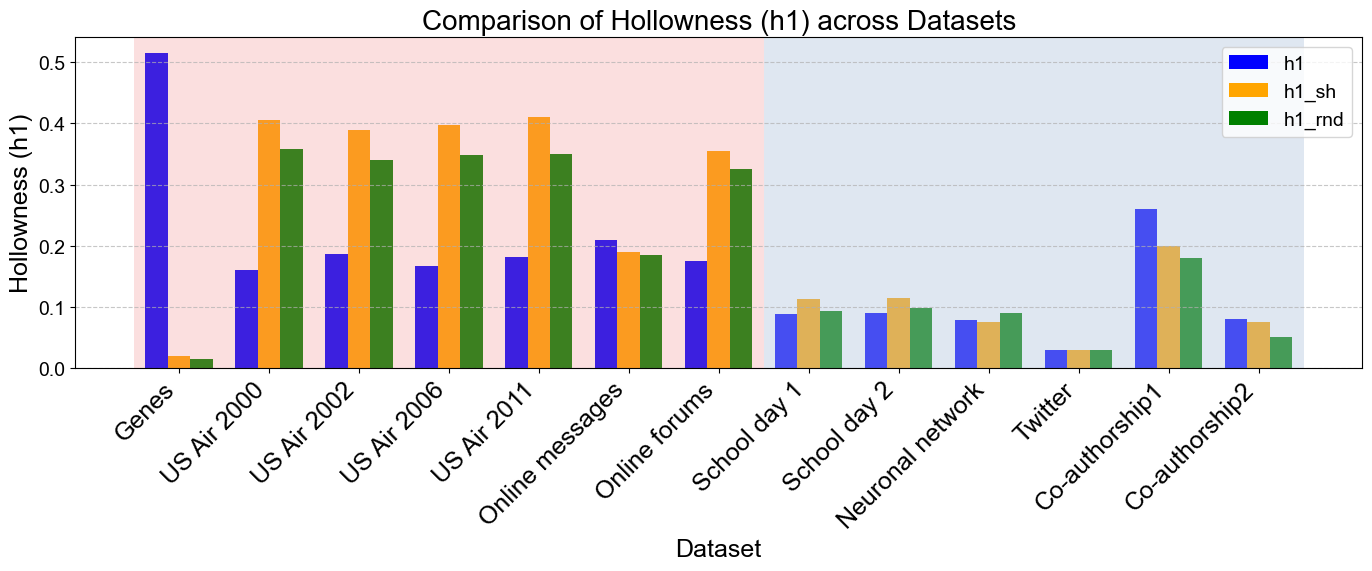

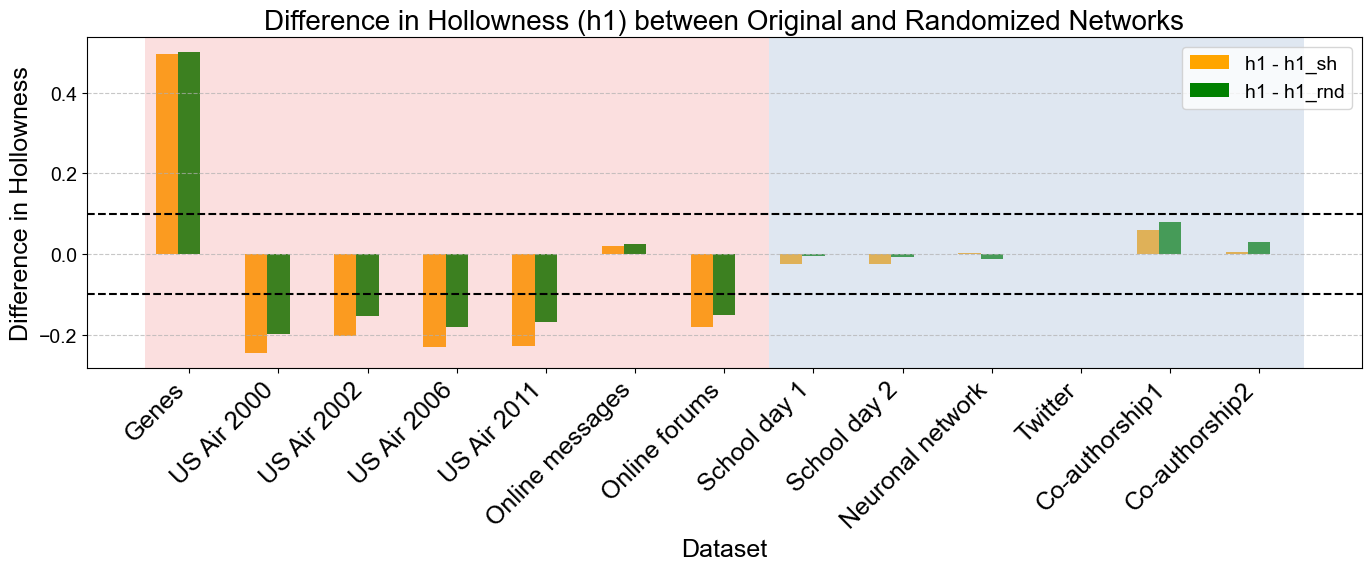

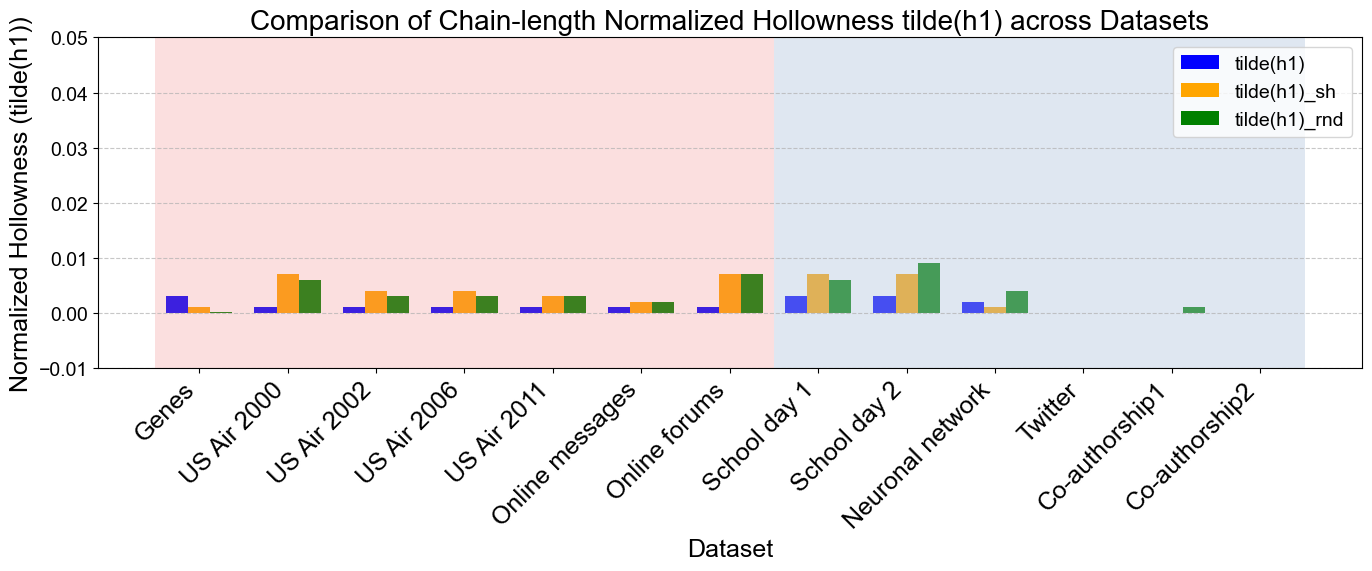

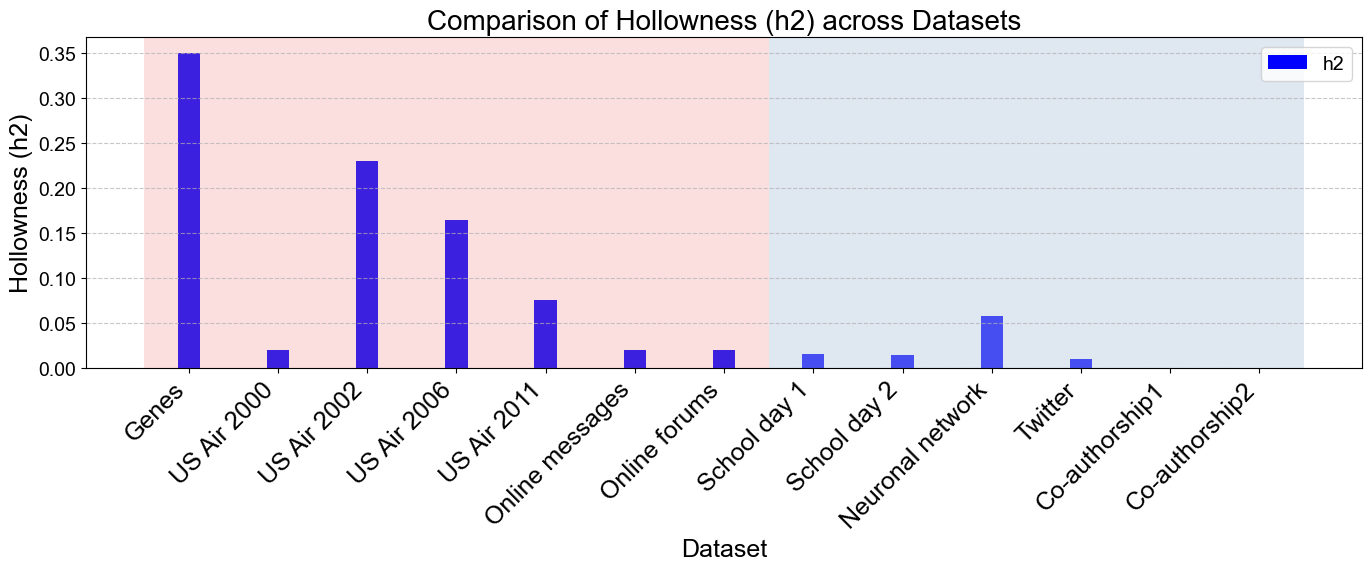

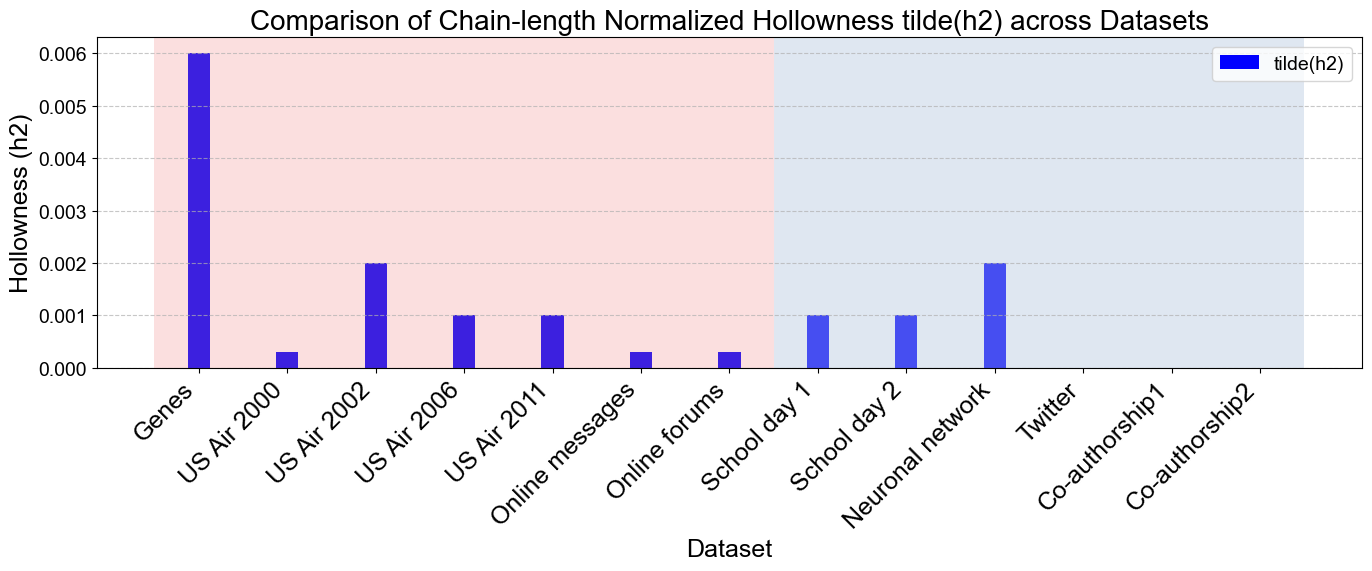

In [16]:
plot_comparison(
    df,
    cols=['h1', 'h1_sh', 'h1_rnd'],
    ylabel='Hollowness (h1)',
    title='Comparison of Hollowness (h1) across Datasets'
)

plot_difference(
    df,
    base_col='h1',
    compare_cols=['h1_sh', 'h1_rnd'],
    labels=['h1 - h1_sh', 'h1 - h1_rnd'],
    ylabel='Difference in Hollowness',
    title='Difference in Hollowness (h1) between Original and Randomized Networks',
    hlines=[0.1, -0.1]
)

plot_comparison(
    df,
    cols=['tilde(h1)', 'tilde(h1)_sh', 'tilde(h1)_rnd'],
    ylabel='Normalized Hollowness (tilde(h1))',
    title='Comparison of Chain-length Normalized Hollowness tilde(h1) across Datasets',
    ylim=(-0.01, 0.05)
)

plot_comparison(
    df,
    cols=['h2'],
    ylabel='Hollowness (h2)',
    title='Comparison of Hollowness (h2) across Datasets'
)
plot_comparison(
    df,
    cols=['tilde(h2)'],
    ylabel='Hollowness (h2)',
    title='Comparison of Chain-length Normalized Hollowness tilde(h2) across Datasets'
)
